## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

Import required modules for data understanding an graphing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline

In [2]:
!ls data

Aviation_Data.csv


In [3]:
aviation_df = pd.read_csv('data/Aviation_Data.csv',
                         parse_dates = ['Event.Date'])

C:\Users\rchag\AppData\Local\Temp\ipykernel_43748\4060357604.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('data/Aviation_Data.csv',


Taking a first look at the data, wanted to see all the columns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [7]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Remove the 'Amateur.Built' planes as they are most likely not the safest or the most cost effective

Seems like taking out all the 'Amateur.built' planes removes planes that appear only a few times in the data

With a cleaner data set lets see if we can now find the lowest risk airplanes for the company
to find this lets compare the cost and potential profits of the top 10 most accident prone planes and bottom 10 most accident prone by make and model

In [8]:
aviation_df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

Seems like taking out all the 'Amateur.built' planes removes planes that appear only a few times in the data

With a cleaner data set lets see if we can now find the lowest risk airplanes for the company
to find this lets compare the cost and potential profits of the top 10 most accident prone planes and bottom 10 most accident prone by make and model

In [9]:
aviation_df['Amateur.Built'] = aviation_df['Amateur.Built'].apply(lambda x: None if x == 'Yes' else x)
aviation_df.dropna(subset = 'Amateur.Built', inplace = True)

Added a make_and_model column to better categorize the planes

In [10]:
aviation_df['Make'] = aviation_df['Make'].str.title()

In [11]:
aviation_df['make_and_model'] = aviation_df['Make'].str.title() + ' ' + aviation_df['Model'].str.title() 

Let's also filter the date from after 1980 as it looks like data before then is sparse

In [12]:
aviation_df['year'] = aviation_df['Event.Date'].dt.year

In [13]:
aviation_df = aviation_df.loc[aviation_df['year'] >= 1980]

In [14]:
aviation_df.fillna(value = {'Total.Serious.Injuries':0,'Total.Fatal.Injuries':0,'Total.Minor.Injuries':0}, inplace = True)

In [15]:
aviation_df['total_injured'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year,total_injured
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Cessna 180,1981,4.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Cessna 140,1982,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Cessna 401B,1982,0.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,North American Navion L-17B,1982,3.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N44832,Piper,PA-28-161,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,Piper Pa-28-161,1982,0.0


Seems like taking out all the 'Amateur.built' planes removes planes that appear only a few times in the data

With a cleaner data set lets see if we can now find the lowest risk airplanes for the company
to find this lets compare the cost and potential profits of the top 10 most accident prone planes and bottom 10 most accident prone by make and model

In [16]:
private_df = aviation_df.dropna(subset = 'Air.carrier')
private_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year,total_injured
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,NaN,NaN,PDK,NaN,Non-Fatal,Substantial,Helicopter,N5745Y,Bell,206L-1,No,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,Unknown,"Rocky Mountain Helicopters, In",0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,02-01-1983,Bell 206L-1,1982,0.0
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N1956H,Piper,PA-34-200T,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Lang Air Service,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983,Piper Pa-34-200T,1982,2.0
39,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,NaN,NaN,NaN,TOMPKINS COUNTY,Fatal(2),Destroyed,Airplane,N546BA,Piper,PA-31,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,SCHD,Unknown,Empire Airlines,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983,Piper Pa-31,1982,2.0
43,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,NaN,NaN,Q35,SPRINGERVILLE,Non-Fatal,Substantial,Airplane,N738XP,Cessna,TR182,No,1.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Joel Frederick's Monarch Air,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,05-01-1983,Cessna Tr182,1982,0.0
44,20020917X01651,Accident,ANC82FA012,1982-01-05,"BETHEL, AK",United States,NaN,NaN,BET,BETHEL,Non-Fatal,Substantial,Airplane,N3343S,Cessna,A185F,No,1.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Executive Charter Service,0.0,2.0,0.0,0.0,VMC,Takeoff,Probable Cause,05-01-1983,Cessna A185F,1982,2.0


In [17]:
personal_df = aviation_df[aviation_df['Purpose.of.flight'] == 'Personal']
top_100_personal = personal_df['Make'].value_counts()[personal_df['Make'].value_counts()>= 100]
top_100_personal

Cessna                            15810
Piper                              9717
Beech                              3287
Mooney                             1102
Bellanca                            752
Aeronca                             526
Maule                               496
Champion                            407
Stinson                             393
Luscombe                            367
Taylorcraft                         332
Robinson                            318
Bell                                294
Boeing                              289
North American                      280
Schweizer                           278
Grumman                             250
Hughes                              196
Grumman American                    174
Cirrus Design Corp                  156
Aero Commander                      156
Ercoupe (Eng & Research Corp.)      137
Schleicher                          128
Lake                                122
Aviat                               112


In [18]:
personal_df = personal_df[personal_df['Make'].isin(list(top_100_personal.index))]

In [19]:
personal_df[personal_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()

Cessna                129
Piper                  63
Beech                  32
Mooney                 21
North American         12
Boeing                 10
Stinson                 5
Bellanca                5
Cirrus Design Corp      5
Aeronca                 5
Schweizer               4
Grumman                 4
Waco                    3
Rockwell                2
Enstrom                 2
Grumman American        2
Champion                2
Taylorcraft             2
Schleicher              2
Maule                   1
Hughes                  1
Lake                    1
Bell                    1
Robinson                1
Aviat                   1
Name: Make, dtype: int64

<Axes: >

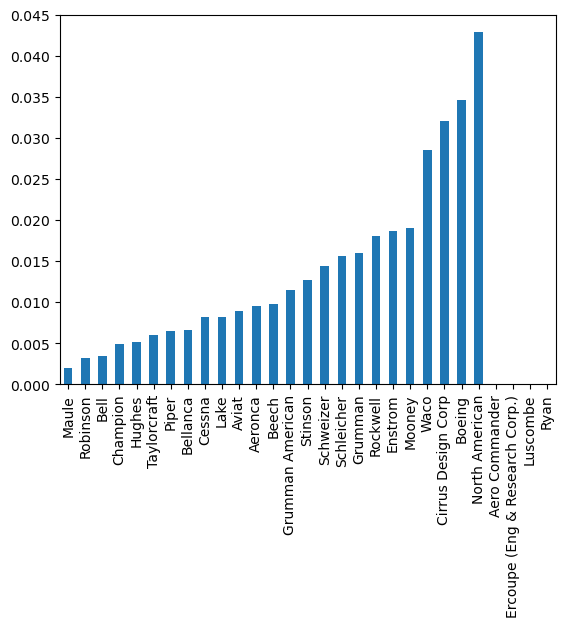

In [20]:
minor_personal = personal_df[personal_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()
make_minor = minor_personal.div(personal_df['Make'].value_counts()).sort_values()

make_minor.plot(kind = 'bar')

In [21]:
substantial_personal = personal_df[personal_df['Aircraft.damage'] == 'Substantial']['Make'].value_counts()

In [22]:
#Cirrus Design Corp                0.032051
#Boeing                            0.034602
#North American                    0.042857
minor_personal.fillna(0,inplace = True)
minor_sub = (minor_personal.add(substantial_personal, fill_value = 0)/personal_df['Make'].value_counts()).sort_values(ascending = False)

In [23]:
personal_df.dropna(subset = 'Aircraft.damage',inplace = True)

In [63]:
minor_sub_df = pd.concat([minor_personal.div(personal_df['Make'].value_counts()),substantial_personal.div(personal_df['Make'].value_counts())],axis =1)

In [64]:
minor_sub_df = minor_sub_df.T.reset_index(drop=True).T.rename(columns = { 0:'Minor Damage',1:'Substantial Damage'})

In [68]:
minor_sub_df.fillna(value = 0, inplace = True)

In [24]:
personal_df.groupby('Make')['total_injured'].mean().sort_values()

Make
Aviat                             0.392857
Maule                             0.414141
Waco                              0.438095
Boeing                            0.501730
Luscombe                          0.579670
Schweizer                         0.610108
Champion                          0.618227
Schleicher                        0.637795
Enstrom                           0.641509
Stinson                           0.664122
Aeronca                           0.706107
Hughes                            0.737113
Taylorcraft                       0.746224
Bellanca                          0.753662
Ercoupe (Eng & Research Corp.)    0.766423
Cessna                            0.790437
North American                    0.867384
Bell                              0.911565
Piper                             0.942162
Grumman                           0.943775
Robinson                          0.946203
Mooney                            0.998174
Lake                              1.032787
Cirrus

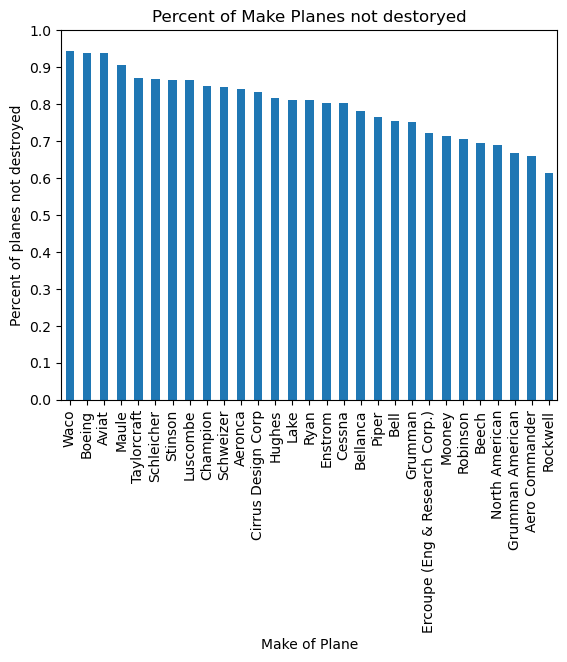

In [77]:
substantial_make = substantial_personal.div(personal_df['Make'].value_counts()).sort_values()
ax= minor_sub.plot(kind = 'bar')
ax.set_xlabel('Make of Plane')
ax.set_ylabel('Percent of planes not destroyed')
ax.set_title('Percent of Make Planes not destoryed')
plt.yticks(np.arange(0, 1.1, 0.1));

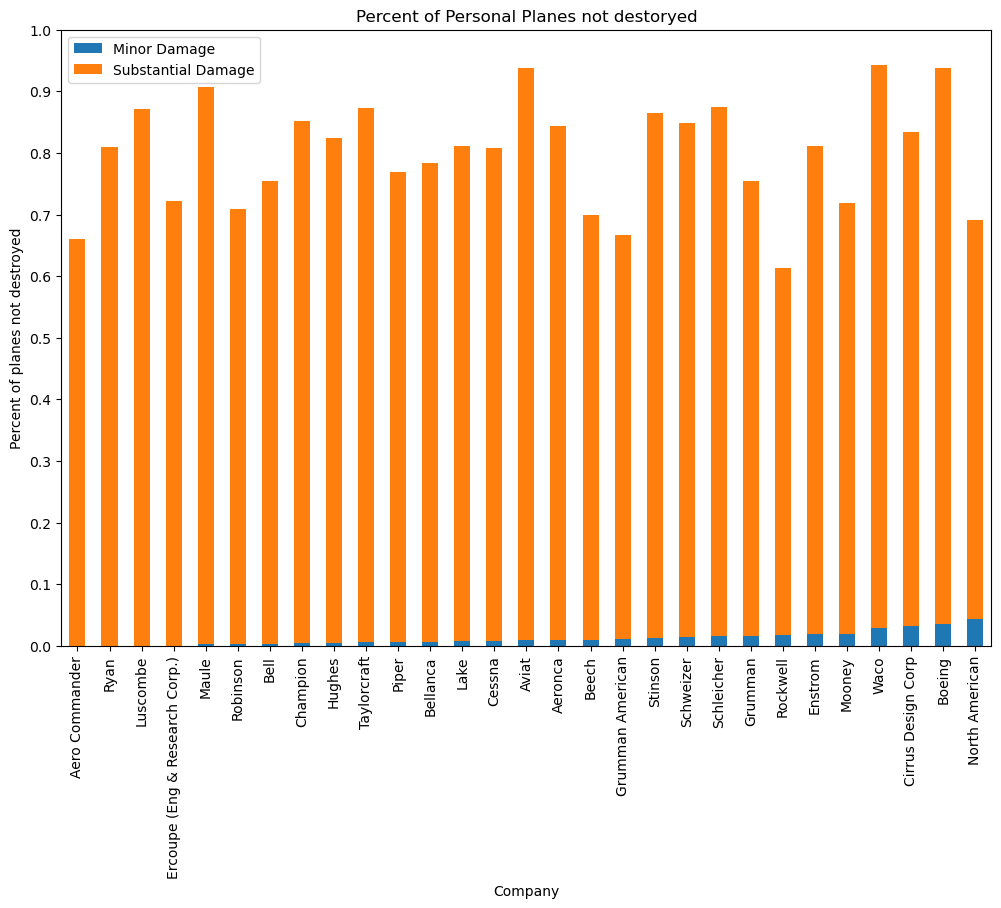

In [76]:
ax= minor_sub_df.sort_values(by = 'Minor Damage').plot(kind = 'bar', stacked = True, figsize = (12,8))
ax.set_xlabel('Company')
ax.set_ylabel('Percent of planes not destroyed')
ax.set_title('Percent of Personal Planes not destoryed')
plt.yticks(np.arange(0, 1.1, 0.1));

In [26]:
list((substantial_make+ make_minor).dropna().sort_values()[-3:].index)

['Aviat', 'Boeing', 'Waco']

In [27]:
private_df['Make'].value_counts().head(20)

Cessna                         3914
Piper                          2041
Boeing                         1393
Beech                           882
Bell                            663
Mcdonnell Douglas               239
Robinson                        225
Airbus                          223
Air Tractor Inc                 188
Robinson Helicopter             176
De Havilland                    175
Embraer                         160
Aerospatiale                    147
Hughes                          147
Eurocopter                      129
Robinson Helicopter Company     126
Schweizer                       126
Air Tractor                     118
Cirrus Design Corp              109
Mooney                          104
Name: Make, dtype: int64

In [28]:
top_100_private = private_df['Make'].value_counts()[private_df['Make'].value_counts()>= 100]

Looks like Robinson is duplicated as well as Air Tractor, lets clean that up

In [29]:
duplicates = {
    'Air Tractor Inc': 'Air Tractor',
    'Robinson':'Robinson Helicopter',
    'Robinson Helicopter Company':'Robinson Helicopter'
}
private_df['Make'] = private_df['Make'].replace(duplicates)

C:\Users\rchag\AppData\Local\Temp\ipykernel_43748\828499401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_df['Make'] = private_df['Make'].replace(duplicates)


In [30]:
private_df = private_df[private_df['Make'].isin(list(top_100_private.index))]

In [31]:
private_df.dropna(subset = 'Aircraft.damage', inplace = True)

In [32]:
minor_private = private_df[private_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()
sub_private = private_df[private_df['Aircraft.damage'] == 'Substantial']['Make'].value_counts()
minor_sub_private = minor_private.add(sub_private, fill_value = 0)

In [33]:
minor_private = minor_private.div(private_df['Make'].value_counts())

In [34]:
sub_private = sub_private.div(private_df['Make'].value_counts())

In [35]:
personal_df.groupby('Make')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Make,,,
Aero Commander,0.660256,0.294872,0.269231
Aeronca,0.202290,0.240458,0.263359
Aviat,0.125000,0.142857,0.125000
Beech,0.652718,0.224496,0.281613
Bell,0.309524,0.309524,0.292517
Bellanca,0.344874,0.195739,0.213049
Boeing,0.086505,0.169550,0.245675
Cessna,0.331829,0.185084,0.273525
Champion,0.221675,0.184729,0.211823


In [36]:
injury_personal = personal_df.groupby('Make')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

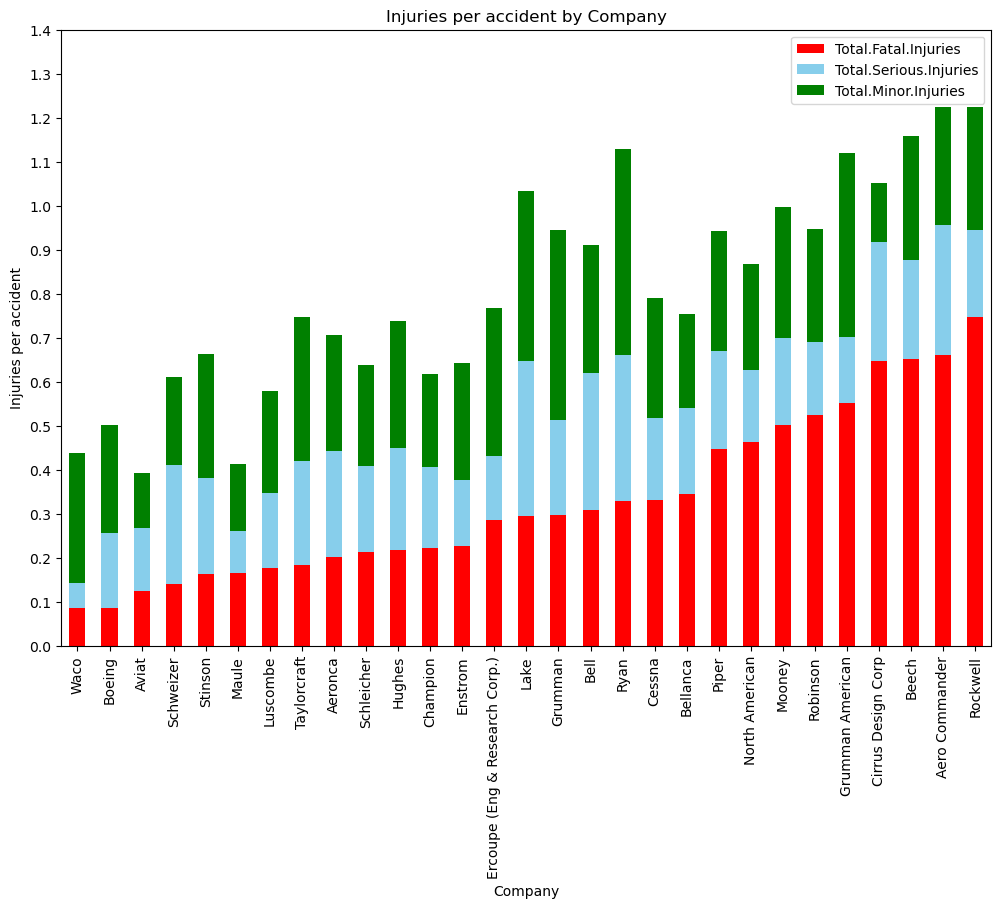

In [58]:
ax = injury_personal.sort_values(by='Total.Fatal.Injuries').plot(kind = 'bar', stacked = True, color=['red', 'skyblue', 'green'], figsize = (12,8))
ax.set_xlabel('Company')
ax.set_ylabel('Injuries per accident')
ax.set_title('Injuries per accident by Company')
plt.yticks(np.arange(0, 1.5, 0.1));


#An option to save the figure
#plt.savefig('injuries_per_accident_by_make', dpi = 1500, bbox_inches="tight")

In [38]:
personal_df[(personal_df['Make'] == 'Waco') & (personal_df['make_and_model'] == 'Waco Ymf-5')][['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.166667
Total.Minor.Injuries      0.666667
dtype: float64

In [39]:
minor_sub_df = pd.concat([minor_private,sub_private], axis = 1)
minor_sub_df = minor_sub_df.T.reset_index(drop=True).T.rename(columns = { 0:'Minor Damage',1:'Substantial Damage'})

In [40]:
minor_sub_df.sort_values(by= 'Minor Damage', inplace = True, ascending = False)

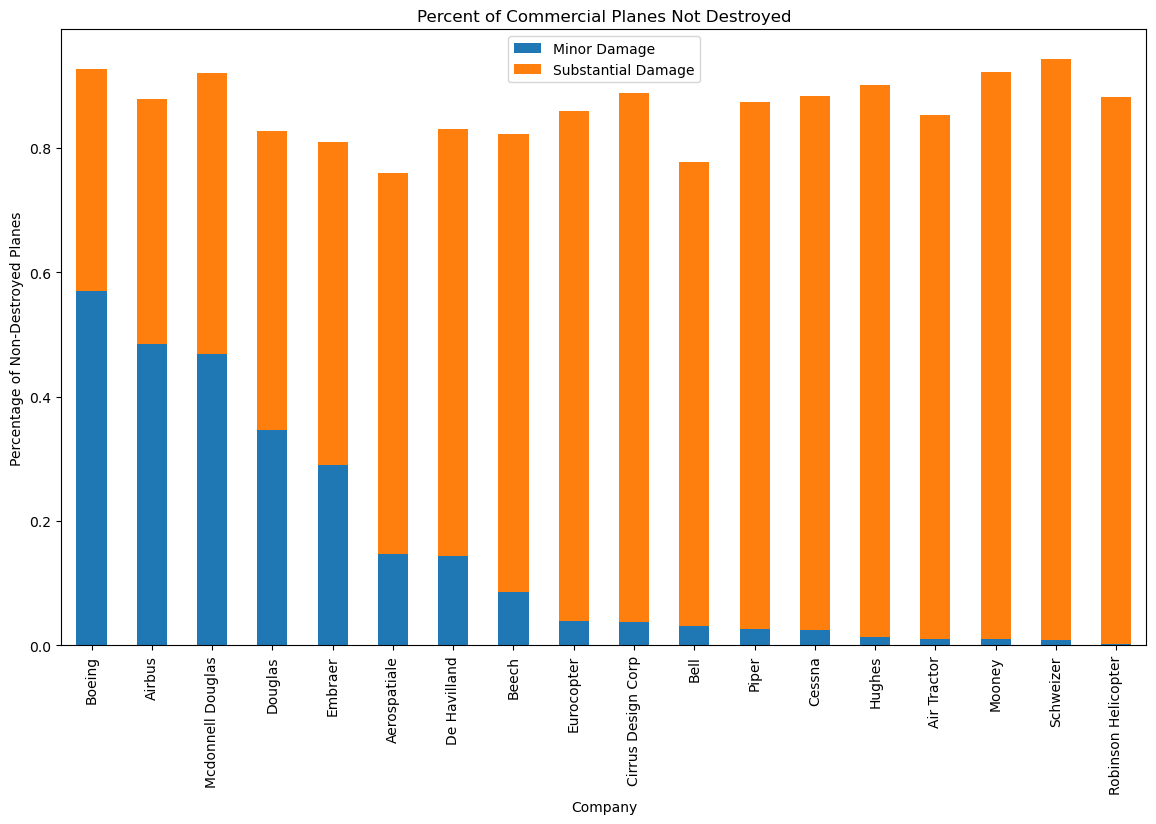

In [49]:
ax = minor_sub_df.plot(kind = 'bar', stacked = True, figsize = (14,8))
ax.set_xlabel('Company')
ax.set_ylabel('Percentage of Non-Destroyed Planes')
ax.set_title('Percent of Commercial Planes Not Destroyed');

In [42]:
duplicates = {
    'Air Tractor Inc': 'Air Tractor',
    'Robinson':'Robinson Helicopter',
    'Robinson Helicopter Company':'Robinson Helicopter'
}
private_df['Make'] = private_df['Make'].replace(duplicates)

In [57]:
private_df.groupby('Make').get_group('Boeing').groupby('Model')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean(numeric_only = True).sort_values(by = 'Total.Fatal.Injuries')

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Model,,,
747-259B,0.000000,0.000000,0.000000
757-2Q8,0.000000,0.000000,0.000000
757-2S7,0.000000,0.000000,0.000000
757-33N,0.000000,0.000000,0.000000
757-351,0.000000,0.000000,0.000000
767 - 204ER,0.000000,0.000000,0.000000
767 323,0.000000,0.000000,0.000000
767 332,0.000000,0.000000,0.000000
767 33A,0.000000,0.000000,0.000000


In [50]:
private_df[private_df['Make'] == 'Boeing']['make_and_model'].value_counts()

Boeing 737               153
Boeing 747                35
Boeing 777                31
Boeing 767                24
Boeing 757                18
Boeing 737-300            12
Boeing 727                11
Boeing A75N1(Pt17)        10
Boeing 727-200             9
Boeing 757-222             8
Boeing 727-223             8
Boeing 747-400             8
Boeing B75N1               8
Boeing A75N1               8
Boeing 737-400             7
Boeing 727-225             7
Boeing 737-200             7
Boeing 787                 6
Boeing 737 7H4             6
Boeing 717-200             6
Boeing 737-222             6
Boeing 737-824             5
Boeing 737-524             5
Boeing 737-322             5
Boeing 727-225A            5
Boeing 727-224             5
Boeing 727-227             4
Boeing 737-232             4
Boeing 727-100             4
Boeing 757-232             4
Boeing 737-823             4
Boeing 757-223             4
Boeing 727-231             4
Boeing 727-232             4
Boeing A75N1 (

Checking on the 'Weather.Condition' Category to see if there was any relationship between accidents and the weather

In [43]:
aviation_df['total_injured'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year,total_injured
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Cessna 180,1981,4.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Cessna 140,1982,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Cessna 401B,1982,0.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,North American Navion L-17B,1982,3.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N44832,Piper,PA-28-161,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,Piper Pa-28-161,1982,0.0


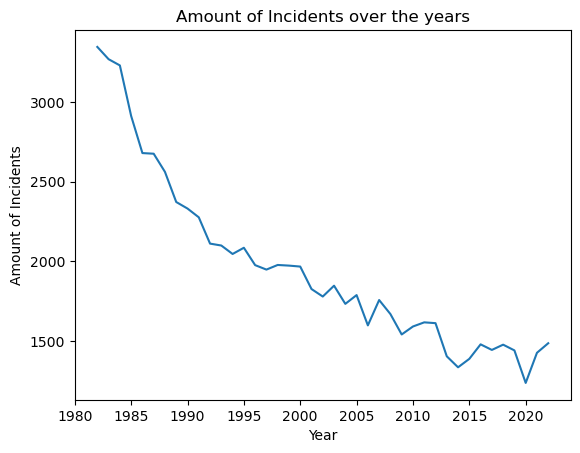

In [44]:
ax = aviation_df.groupby('year')['Accident.Number'].count()[1:].plot(kind = 'line')
ax.set_xlabel('Year')
ax.set_ylabel('Amount of Incidents')
ax.set_title('Amount of Incidents over the years');

In [45]:
aviation_df.to_csv('aviation_df.csv')